In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = r'C:\Users\DELL\Desktop\TSLA.csv'
data = pd.read_csv(file_path)


In [6]:
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
mean    138.691296   141.771603   135.425953   138.762183   138.762183   
std     250.044839   255.863239   243.774157   250.123115   250.123115   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      19.627000    20.402000    19.127500    19.615000    19.615000   
50%      46.656999    47.487001    45.820002    46.545000    46.545000   
75%      68.057001    69.357500    66.911501    68.103998    68.103998   
max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   

             Volume  
count  2.956000e+03  
mean   3.131449e+07  
std    2.798383e+07  
min    5.925000e+05  
25%    1.310288e+07  
50%    2.488680e+07  
75%    3.973875e+07  
max    3.046940e+08  


In [7]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])


In [9]:
data.set_index('Date', inplace=True)

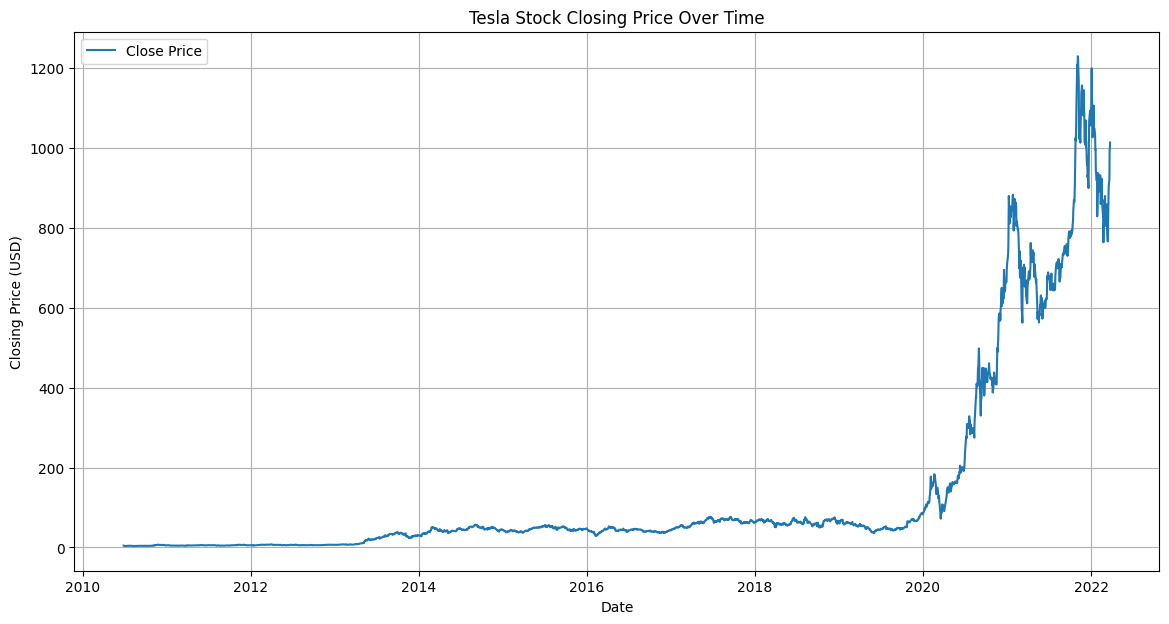

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


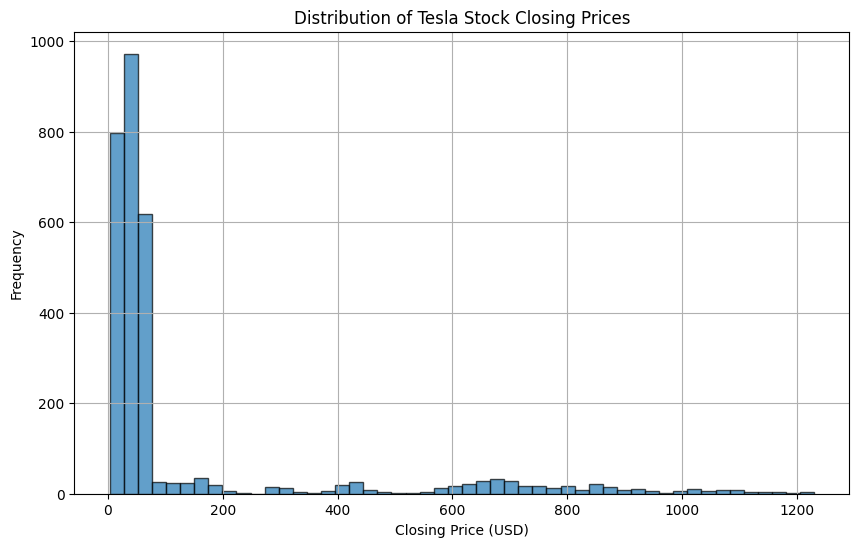

In [11]:
# Plotting the distribution of the closing price
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tesla Stock Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


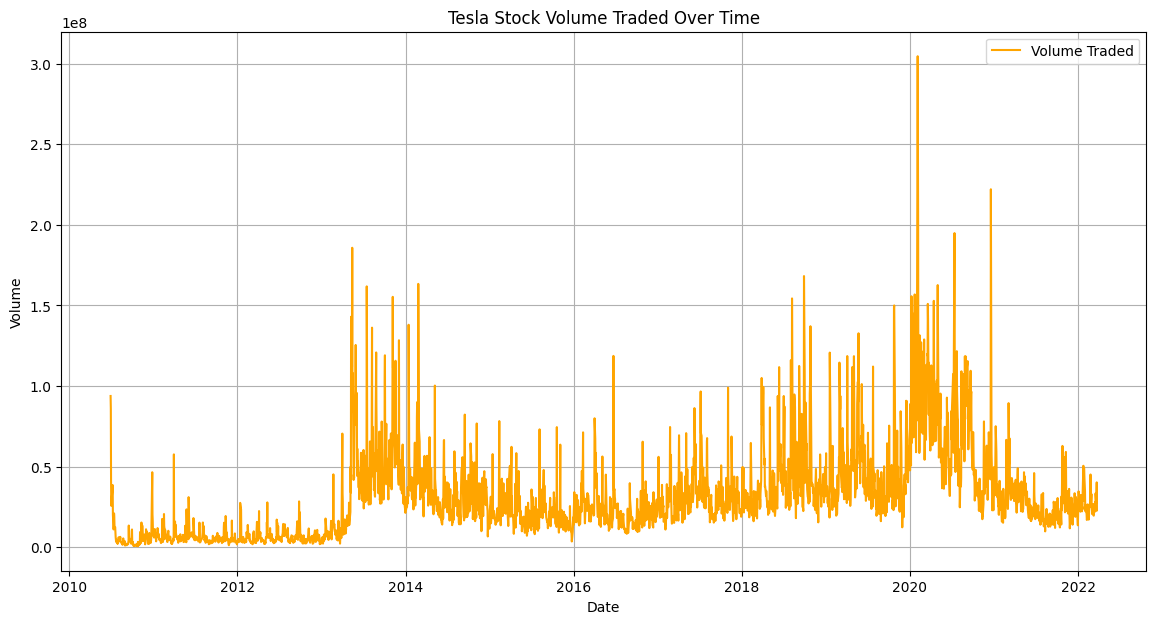

In [12]:
# Plotting the volume traded over time
plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Volume Traded', color='orange')
plt.title('Tesla Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999726  0.999617  0.999247   0.999247  0.089750
High       0.999726  1.000000  0.999595  0.999666   0.999666  0.093625
Low        0.999617  0.999595  1.000000  0.999670   0.999670  0.085906
Close      0.999247  0.999666  0.999670  1.000000   1.000000  0.090602
Adj Close  0.999247  0.999666  0.999670  1.000000   1.000000  0.090602
Volume     0.089750  0.093625  0.085906  0.090602   0.090602  1.000000


In [17]:
# Moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

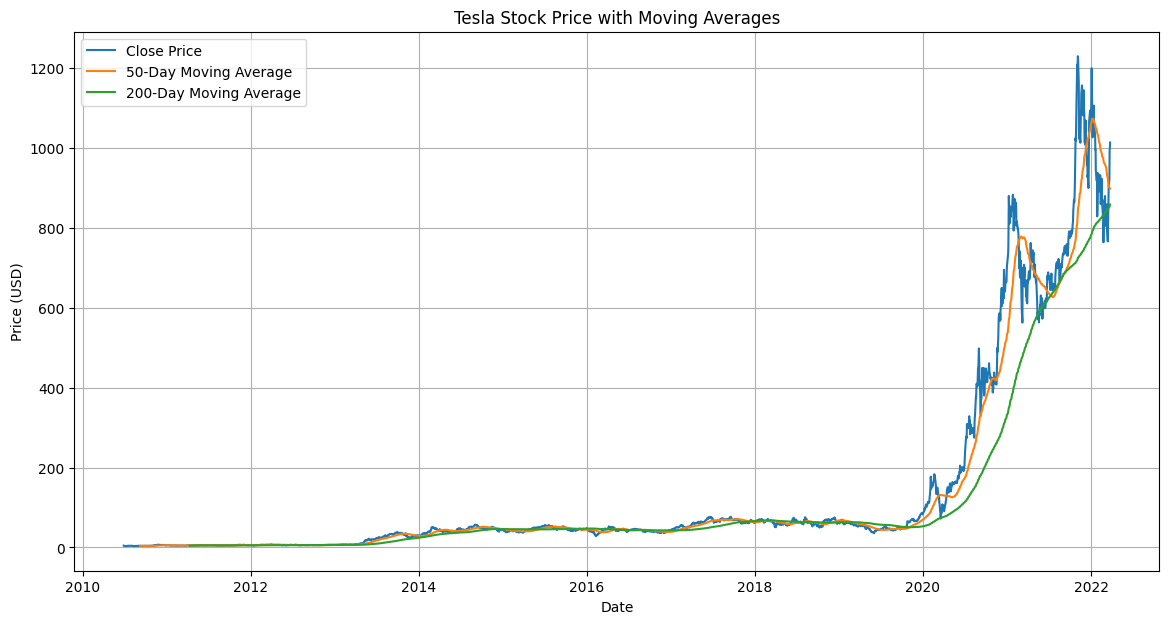

In [18]:
# Plotting moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.plot(data['MA200'], label='200-Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import numpy as np
data['Returns'] = data['Close'].pct_change()
data['Volatility'] = data['Returns'].rolling(window=252).std() * np.sqrt(252)


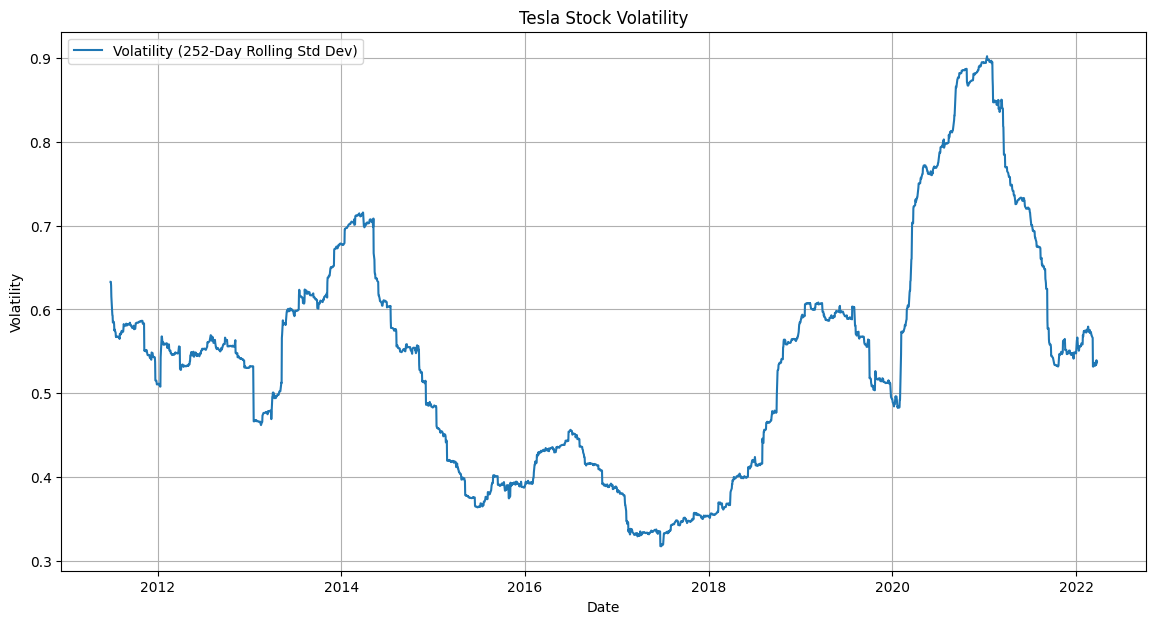

In [21]:
# Plotting volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Volatility'], label='Volatility (252-Day Rolling Std Dev)')
plt.title('Tesla Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


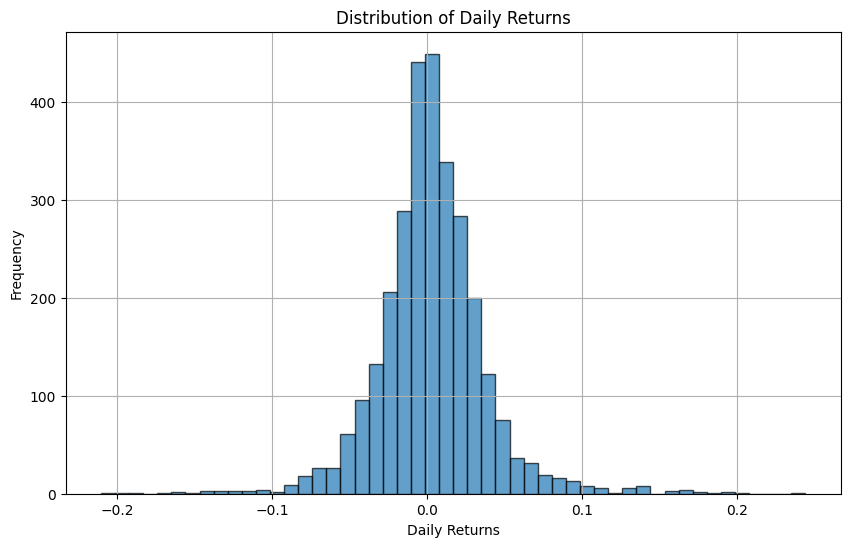

In [22]:
# Daily returns histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Returns'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

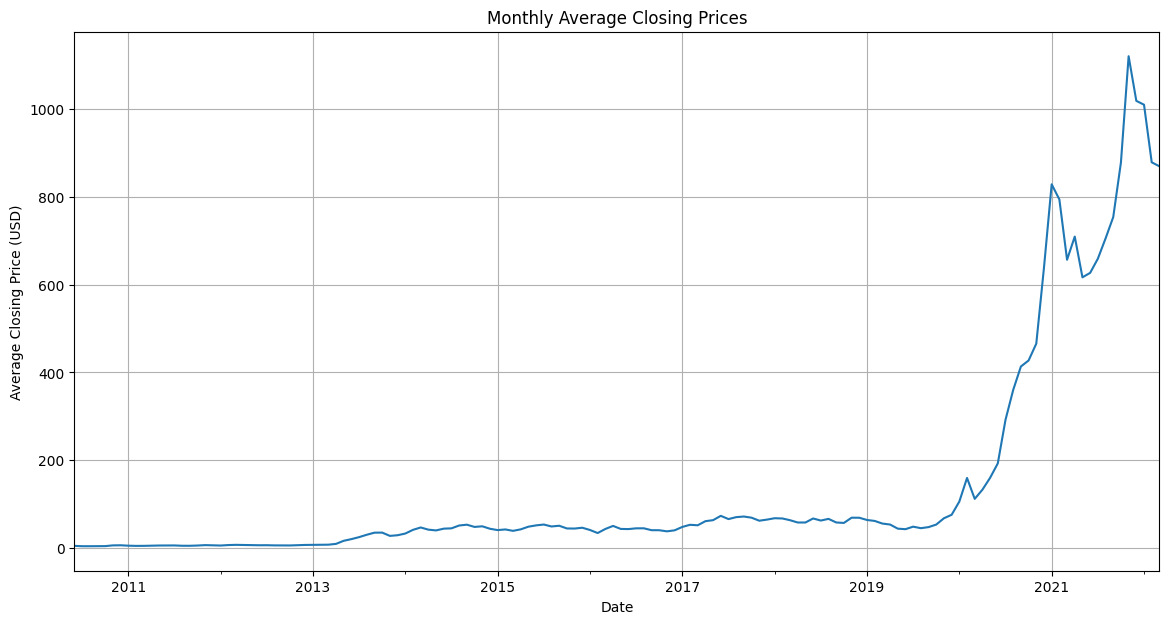

In [23]:
# Monthly average closing prices
data['YearMonth'] = data.index.to_period('M')
monthly_avg_close = data.groupby('YearMonth')['Close'].mean()

plt.figure(figsize=(14, 7))
monthly_avg_close.plot()
plt.title('Monthly Average Closing Prices')
plt.xlabel('Date')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()


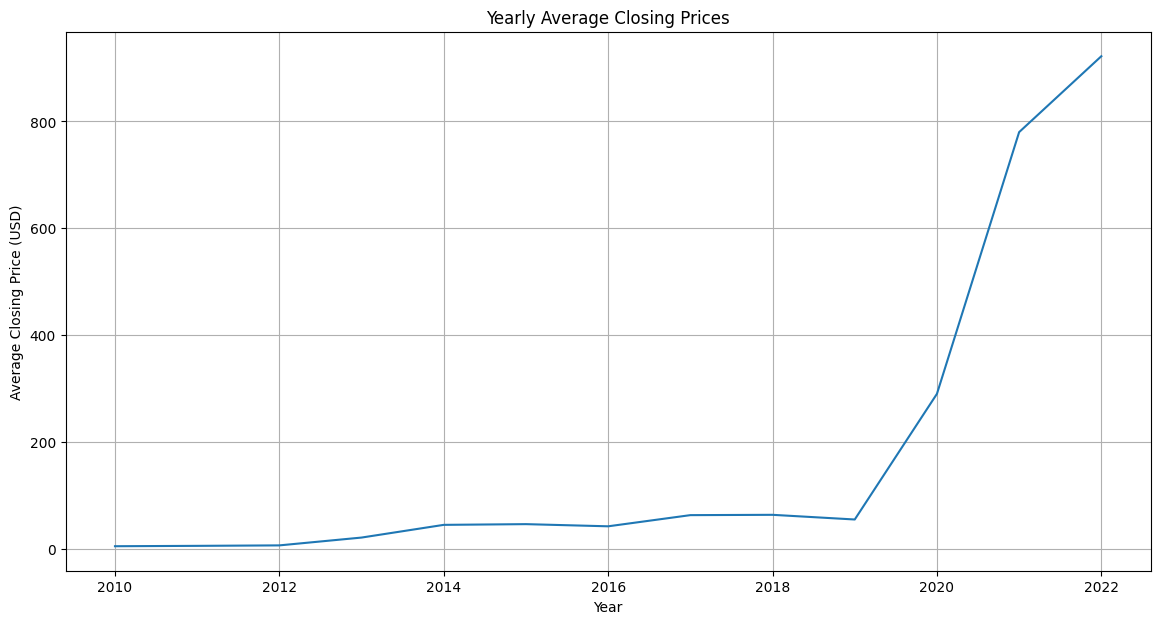

In [24]:
# Yearly trends and seasonality
data['Year'] = data.index.year
data['Month'] = data.index.month
yearly_trends = data.groupby('Year')['Close'].mean()

plt.figure(figsize=(14, 7))
yearly_trends.plot()
plt.title('Yearly Average Closing Prices')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()
